In [4]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [5]:
df = pd.read_csv('Final-data.csv')

In [6]:
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,1
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,4,10,11,10,0
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,4,15,15,16,0
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,5,6,11,12,9,0
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,6,10,10,10,0


In [7]:
def get_romantic(row):

    if row['romantic']=='yes':
        return 1
    else:
        return 0

In [8]:
df['Romantic'] = df.apply(get_romantic, axis=1)
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject,Romantic
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,1,1,3,6,5,6,6,1,0
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,1,1,3,4,5,5,6,1,0
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,2,2,3,3,10,7,8,10,1,0
3,3,GP,F,15,U,GT3,T,4,2,health,...,2,1,1,5,2,15,14,15,1,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,2,1,2,5,4,6,10,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,2,1,2,5,4,10,11,10,0,0
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,4,1,1,1,4,15,15,16,0,0
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,5,6,11,12,9,0,0
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,5,3,4,2,6,10,10,10,0,0


In [9]:
def get_internet(row):

    if row['internet']=='yes':
        return 1
    else:
        return 0

In [10]:
df['Internet'] = df.apply(get_internet, axis=1)
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,Dalc,Walc,health,absences,G1,G2,G3,Subject,Romantic,Internet
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,1,1,3,6,5,6,6,1,0,0
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,1,1,3,4,5,5,6,1,0,1
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,2,3,3,10,7,8,10,1,0,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,1,1,5,2,15,14,15,1,1,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,1,2,5,4,6,10,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,1,2,5,4,10,11,10,0,0,1
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,1,1,1,4,15,15,16,0,0,1
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,1,1,5,6,11,12,9,0,0,0
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,3,4,2,6,10,10,10,0,0,1


In [11]:
def get_higher(row):

    if row['higher']=='yes':
        return 1
    else:
        return 0

In [12]:
df['Higher'] = df.apply(get_higher, axis=1)
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,Walc,health,absences,G1,G2,G3,Subject,Romantic,Internet,Higher
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,1,3,6,5,6,6,1,0,0,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,1,3,4,5,5,6,1,0,1,1
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,3,3,10,7,8,10,1,0,1,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,1,5,2,15,14,15,1,1,1,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,2,5,4,6,10,10,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,2,5,4,10,11,10,0,0,1,1
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,1,1,4,15,15,16,0,0,1,1
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,1,5,6,11,12,9,0,0,0,1
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,4,2,6,10,10,10,0,0,1,1


In [13]:
def get_nursery(row):

    if row['nursery']=='yes':
        return 1
    else:
        return 0

In [14]:
df['Nursery'] = df.apply(get_nursery, axis=1)
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,health,absences,G1,G2,G3,Subject,Romantic,Internet,Higher,Nursery
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,3,6,5,6,6,1,0,0,1,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,4,5,5,6,1,0,1,1,0
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,3,10,7,8,10,1,0,1,1,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,5,2,15,14,15,1,1,1,1,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,5,4,6,10,10,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,5,4,10,11,10,0,0,1,1,0
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,1,4,15,15,16,0,0,1,1,1
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,5,6,11,12,9,0,0,0,1,1
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,2,6,10,10,10,0,0,1,1,0


In [15]:
def get_activities(row):

    if row['activities']=='yes':
        return 1
    else:
        return 0

In [16]:
df['Activities'] = df.apply(get_activities, axis=1)
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,absences,G1,G2,G3,Subject,Romantic,Internet,Higher,Nursery,Activities
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,6,5,6,6,1,0,0,1,1,0
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,4,5,5,6,1,0,1,1,0,0
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,10,7,8,10,1,0,1,1,1,0
3,3,GP,F,15,U,GT3,T,4,2,health,...,2,15,14,15,1,1,1,1,1,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,6,10,10,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,4,10,11,10,0,0,1,1,0,1
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,4,15,15,16,0,0,1,1,1,0
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,6,11,12,9,0,0,0,1,1,1
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,6,10,10,10,0,0,1,1,0,0


In [17]:
def get_paid(row):

    if row['paid']=='yes':
        return 1
    else:
        return 0

In [18]:
df['Paid'] = df.apply(get_paid, axis=1)
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,G1,G2,G3,Subject,Romantic,Internet,Higher,Nursery,Activities,Paid
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,5,6,6,1,0,0,1,1,0,0
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,5,6,1,0,1,1,0,0,0
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,7,8,10,1,0,1,1,1,0,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,15,14,15,1,1,1,1,1,1,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,6,10,10,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,10,11,10,0,0,1,1,0,1,0
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,15,15,16,0,0,1,1,1,0,0
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,11,12,9,0,0,0,1,1,1,0
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,10,10,10,0,0,1,1,0,0,0


In [19]:
def get_famsup(row):

    if row['famsup']=='yes':
        return 1
    else:
        return 0

In [20]:
df['Famsup'] = df.apply(get_famsup, axis=1)
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,G2,G3,Subject,Romantic,Internet,Higher,Nursery,Activities,Paid,Famsup
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,6,6,1,0,0,1,1,0,0,0
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,6,1,0,1,1,0,0,0,1
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,8,10,1,0,1,1,1,0,1,0
3,3,GP,F,15,U,GT3,T,4,2,health,...,14,15,1,1,1,1,1,1,1,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,10,10,1,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,11,10,0,0,1,1,0,1,0,0
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,15,16,0,0,1,1,1,0,0,1
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,12,9,0,0,0,1,1,1,0,0
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,10,10,0,0,1,1,0,0,0,0


In [21]:
def get_schoolsup(row):

    if row['schoolsup']=='yes':
        return 1
    else:
        return 0

In [22]:
df['Schoolsup'] = df.apply(get_schoolsup, axis=1)
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,G3,Subject,Romantic,Internet,Higher,Nursery,Activities,Paid,Famsup,Schoolsup
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,6,1,0,0,1,1,0,0,0,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,6,1,0,1,1,0,0,0,1,0
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,10,1,0,1,1,1,0,1,0,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,15,1,1,1,1,1,1,1,1,0
4,4,GP,F,16,U,GT3,T,3,3,other,...,10,1,0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,10,0,0,1,1,0,1,0,0,0
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,16,0,0,1,1,1,0,0,1,0
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,9,0,0,0,1,1,1,0,0,0
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,10,0,0,1,1,0,0,0,0,0


In [23]:
def get_address(row):

    if row['address']=='U':
        return 1
    else:
        return 0

In [24]:
df['Address'] = df.apply(get_address, axis=1)
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,Subject,Romantic,Internet,Higher,Nursery,Activities,Paid,Famsup,Schoolsup,Address
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,1,0,0,1,1,0,0,0,1,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,1,0,1,1,0,0,0,1,0,1
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,1,0,1,1,1,0,1,0,1,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,1,1,1,1,1,1,1,1,0,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,1,0,0,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,0,0,1,1,0,1,0,0,0,0
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,0,0,1,1,1,0,0,1,0,1
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,0,0,0,1,1,1,0,0,0,1
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,0,0,1,1,0,0,0,0,0,1


In [25]:
def get_sex(row):

    if row['sex']=='M':
        return 1
    else:
        return 0

In [26]:
df['Sex'] = df.apply(get_sex, axis=1)
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,Romantic,Internet,Higher,Nursery,Activities,Paid,Famsup,Schoolsup,Address,Sex
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,0,0,1,1,0,0,0,1,1,0
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,0,1,1,0,0,0,1,0,1,0
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,0,1,1,1,0,1,0,1,1,0
3,3,GP,F,15,U,GT3,T,4,2,health,...,1,1,1,1,1,1,1,0,1,0
4,4,GP,F,16,U,GT3,T,3,3,other,...,0,0,1,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,0,1,1,0,1,0,0,0,0,0
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,0,1,1,1,0,0,1,0,1,0
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,0,0,1,1,1,0,0,0,1,0
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,0,1,1,0,0,0,0,0,1,1


In [27]:
df = df.drop(['address', 'sex', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], axis=1)
df

,Unnamed: 0,school,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Romantic,Internet,Higher,Nursery,Activities,Paid,Famsup,Schoolsup,Address,Sex
0,0,GP,18,GT3,A,4,4,at_home,teacher,course,...,0,0,1,1,0,0,0,1,1,0
1,1,GP,17,GT3,T,1,1,at_home,other,course,...,0,1,1,0,0,0,1,0,1,0
2,2,GP,15,LE3,T,1,1,at_home,other,other,...,0,1,1,1,0,1,0,1,1,0
3,3,GP,15,GT3,T,4,2,health,services,home,...,1,1,1,1,1,1,1,0,1,0
4,4,GP,16,GT3,T,3,3,other,other,home,...,0,0,1,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,19,GT3,T,2,3,services,other,course,...,0,1,1,0,1,0,0,0,0,0
1040,1040,MS,18,LE3,T,3,1,teacher,services,course,...,0,1,1,1,0,0,1,0,1,0
1041,1041,MS,18,GT3,T,1,1,other,other,course,...,0,0,1,1,1,0,0,0,1,0
1042,1042,MS,17,LE3,T,3,1,services,services,course,...,0,1,1,0,0,0,0,0,1,1


In [28]:
#Derived Feature- avg_alc
#For alcohol let's consider categories:
#1 : very low
#2 : low
#3 : moderate
#4 : high
#5 : very high
df['avg_alc'] = (df['Dalc'] + df['Walc']) / 2

In [29]:
df.head(5)

,Unnamed: 0,school,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Internet,Higher,Nursery,Activities,Paid,Famsup,Schoolsup,Address,Sex,avg_alc
0,0,GP,18,GT3,A,4,4,at_home,teacher,course,...,0,1,1,0,0,0,1,1,0,1.0
1,1,GP,17,GT3,T,1,1,at_home,other,course,...,1,1,0,0,0,1,0,1,0,1.0
2,2,GP,15,LE3,T,1,1,at_home,other,other,...,1,1,1,0,1,0,1,1,0,2.5
3,3,GP,15,GT3,T,4,2,health,services,home,...,1,1,1,1,1,1,0,1,0,1.0
4,4,GP,16,GT3,T,3,3,other,other,home,...,0,1,1,0,1,1,0,1,0,1.5


In [30]:
#dropping the features used in calculating ses_status
df = df.drop(['Dalc', 'Walc'], axis = 1)

In [31]:
df

,Unnamed: 0,school,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Internet,Higher,Nursery,Activities,Paid,Famsup,Schoolsup,Address,Sex,avg_alc
0,0,GP,18,GT3,A,4,4,at_home,teacher,course,...,0,1,1,0,0,0,1,1,0,1.0
1,1,GP,17,GT3,T,1,1,at_home,other,course,...,1,1,0,0,0,1,0,1,0,1.0
2,2,GP,15,LE3,T,1,1,at_home,other,other,...,1,1,1,0,1,0,1,1,0,2.5
3,3,GP,15,GT3,T,4,2,health,services,home,...,1,1,1,1,1,1,0,1,0,1.0
4,4,GP,16,GT3,T,3,3,other,other,home,...,0,1,1,0,1,1,0,1,0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,19,GT3,T,2,3,services,other,course,...,1,1,0,1,0,0,0,0,0,1.5
1040,1040,MS,18,LE3,T,3,1,teacher,services,course,...,1,1,1,0,0,1,0,1,0,1.0
1041,1041,MS,18,GT3,T,1,1,other,other,course,...,0,1,1,1,0,0,0,1,0,1.0
1042,1042,MS,17,LE3,T,3,1,services,services,course,...,1,1,0,0,0,0,0,1,1,3.5


# DERIVED FEATURE - Final_Score¶

30% weightage is given to period 1 and period 2 exam and 40% is given to final exam.

These weights have been based on correlations between G1, G2, G3, Final_Score.

In [32]:
weight_g1 = 0.3
weight_g2 = 0.3
weight_g3 = 0.4

In [33]:
df['Final_Score'] = (df['G1']*weight_g1)+(df['G2']*weight_g2)+(df['G3']*weight_g3)
df['Final_Score'] = df['Final_Score'].round()
df

,Unnamed: 0,school,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Higher,Nursery,Activities,Paid,Famsup,Schoolsup,Address,Sex,avg_alc,Final_Score
0,0,GP,18,GT3,A,4,4,at_home,teacher,course,...,1,1,0,0,0,1,1,0,1.0,6.0
1,1,GP,17,GT3,T,1,1,at_home,other,course,...,1,0,0,0,1,0,1,0,1.0,5.0
2,2,GP,15,LE3,T,1,1,at_home,other,other,...,1,1,0,1,0,1,1,0,2.5,8.0
3,3,GP,15,GT3,T,4,2,health,services,home,...,1,1,1,1,1,0,1,0,1.0,15.0
4,4,GP,16,GT3,T,3,3,other,other,home,...,1,1,0,1,1,0,1,0,1.5,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,19,GT3,T,2,3,services,other,course,...,1,0,1,0,0,0,0,0,1.5,10.0
1040,1040,MS,18,LE3,T,3,1,teacher,services,course,...,1,1,0,0,1,0,1,0,1.0,15.0
1041,1041,MS,18,GT3,T,1,1,other,other,course,...,1,1,1,0,0,0,1,0,1.0,10.0
1042,1042,MS,17,LE3,T,3,1,services,services,course,...,1,0,0,0,0,0,1,1,3.5,10.0


In [34]:
df = df.drop(['Unnamed: 0','G1','G2','G3'], axis=1)

In [35]:
df

,school,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,Higher,Nursery,Activities,Paid,Famsup,Schoolsup,Address,Sex,avg_alc,Final_Score
0,GP,18,GT3,A,4,4,at_home,teacher,course,mother,...,1,1,0,0,0,1,1,0,1.0,6.0
1,GP,17,GT3,T,1,1,at_home,other,course,father,...,1,0,0,0,1,0,1,0,1.0,5.0
2,GP,15,LE3,T,1,1,at_home,other,other,mother,...,1,1,0,1,0,1,1,0,2.5,8.0
3,GP,15,GT3,T,4,2,health,services,home,mother,...,1,1,1,1,1,0,1,0,1.0,15.0
4,GP,16,GT3,T,3,3,other,other,home,father,...,1,1,0,1,1,0,1,0,1.5,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,19,GT3,T,2,3,services,other,course,mother,...,1,0,1,0,0,0,0,0,1.5,10.0
1040,MS,18,LE3,T,3,1,teacher,services,course,mother,...,1,1,0,0,1,0,1,0,1.0,15.0
1041,MS,18,GT3,T,1,1,other,other,course,mother,...,1,1,1,0,0,0,1,0,1.0,10.0
1042,MS,17,LE3,T,3,1,services,services,course,mother,...,1,0,0,0,0,0,1,1,3.5,10.0


# Derived Feature - SES_Score

In [36]:
# Function to map socioeconomic status based on features which could affect ses
def get_ses_status_score(row):
    ses_score = 0
    
    # Add points based on parents' education
    if row['Medu'] in ['0','1']:
        ses_score +=1
    elif row['Medu'] == '2':
        ses_score +=2
    elif row['Medu'] == '3':
        ses_score +=3
    elif row['Medu'] == '4':
        ses_score +=4
    
    if row['Fedu'] in ['0','1']:
        ses_score +=1
    elif row['Fedu'] == '2':
        ses_score +=2
    elif row['Fedu'] == '3':
        ses_score +=3
    elif row['Fedu'] == '4':
        ses_score +=4
        
    # Add points based on parents' occupation (Mother_job and Father_job)
    if row['Mjob'] in ['at_home','other']:
        ses_score += 1
    if row['Mjob'] in ['teacher','health','services']:
        ses_score += 2
    
    
    if row['Fjob'] in ['at_home','other']:
        ses_score += 1
    if row['Fjob'] in ['teacher','health','services']:
        ses_score += 2
        
    
    # Add points based on family size (famsize)
    if row['famsize'] == 'LE3':
        ses_score += 1
    
    # Add points based on address (Urban or Rural)
    if row['Address'] == 1:
        ses_score += 1
    
    # Add points based on Parents_status (Together or Apart)
    if row['Pstatus'] =='T':
        ses_score += 1
        
    # Add points based on guardian
    if row['guardian'] in ['mother','father']:
        ses_score += 1
    if row['guardian'] == 'other':
        ses_score += 2
        
    
    
    # Add points based on school_support, fam_support, paid_extra_classes, higher_edu, internet, and nursery
    if row['Schoolsup'] == 1:
        ses_score += 1
        
    if row['Famsup'] == 1:
        ses_score += 1
    
    if row['Paid'] == 1:
        ses_score += 1
    
    if row['Higher'] == 1:
        ses_score += 1
    
    if row['Internet'] == 1:
        ses_score += 1
    
    if row['Nursery'] == 1:
        ses_score += 1
        
    if row['Romantic'] == 1:
        ses_score += 1
    
    if row['Activities'] == 1:
        ses_score += 1
        
        
    return ses_score
    
    

In [37]:
df['ses_score'] = df.apply(get_ses_status_score, axis = 1)
df.head(20)

,school,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,Nursery,Activities,Paid,Famsup,Schoolsup,Address,Sex,avg_alc,Final_Score,ses_score
0,GP,18,GT3,A,4,4,at_home,teacher,course,mother,...,1,0,0,0,1,1,0,1.0,6.0,8
1,GP,17,GT3,T,1,1,at_home,other,course,father,...,0,0,0,1,0,1,0,1.0,5.0,8
2,GP,15,LE3,T,1,1,at_home,other,other,mother,...,1,0,1,0,1,1,0,2.5,8.0,11
3,GP,15,GT3,T,4,2,health,services,home,mother,...,1,1,1,1,0,1,0,1.0,15.0,14
4,GP,16,GT3,T,3,3,other,other,home,father,...,1,0,1,1,0,1,0,1.5,9.0,9
5,GP,16,LE3,T,4,3,services,other,reputation,mother,...,1,1,1,1,0,1,1,1.5,15.0,13
6,GP,16,LE3,T,2,2,other,other,home,mother,...,1,0,0,0,0,1,1,1.0,12.0,9
7,GP,17,GT3,A,4,4,other,teacher,home,mother,...,1,0,0,1,1,1,0,1.0,6.0,9
8,GP,15,LE3,A,3,2,services,other,home,mother,...,1,0,1,1,0,1,1,1.0,18.0,11
9,GP,15,GT3,T,3,4,other,other,home,mother,...,1,1,1,1,0,1,1,1.0,15.0,11


In [38]:
# Calculate quartiles to derive threshold values
q1 = np.percentile(df['ses_score'],25)
q2 = np.percentile(df['ses_score'],50)  #Median
q3 = np.percentile(df['ses_score'],75)

# Print the calculated quartiles
print("1st Quartile (25th percentile):",q1)
print("2st Quartile (Median, 50th percentile):",q2)
print("3st Quartile (75th percentile):",q3)

1st Quartile (25th percentile): 9.0
2st Quartile (Median, 50th percentile): 10.0
3st Quartile (75th percentile): 11.0


In [39]:
ses_array = []
ses_array = df['ses_score']
ses_array = set(ses_array)
ses_array

{5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [40]:
def get_ses_status_category(row):
    # Categorize SES score into 'Low', 'Medium', and 'High'
    if row['ses_score'] < 8:
        return 'Low'
    elif row['ses_score'] <= 10:
        return 'Medium'
    else :
        return 'High'

In [41]:
df['ses_status'] = df.apply(get_ses_status_category, axis=1)
df.head(10)

,school,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,Activities,Paid,Famsup,Schoolsup,Address,Sex,avg_alc,Final_Score,ses_score,ses_status
0,GP,18,GT3,A,4,4,at_home,teacher,course,mother,...,0,0,0,1,1,0,1.0,6.0,8,Medium
1,GP,17,GT3,T,1,1,at_home,other,course,father,...,0,0,1,0,1,0,1.0,5.0,8,Medium
2,GP,15,LE3,T,1,1,at_home,other,other,mother,...,0,1,0,1,1,0,2.5,8.0,11,High
3,GP,15,GT3,T,4,2,health,services,home,mother,...,1,1,1,0,1,0,1.0,15.0,14,High
4,GP,16,GT3,T,3,3,other,other,home,father,...,0,1,1,0,1,0,1.5,9.0,9,Medium
5,GP,16,LE3,T,4,3,services,other,reputation,mother,...,1,1,1,0,1,1,1.5,15.0,13,High
6,GP,16,LE3,T,2,2,other,other,home,mother,...,0,0,0,0,1,1,1.0,12.0,9,Medium
7,GP,17,GT3,A,4,4,other,teacher,home,mother,...,0,0,1,1,1,0,1.0,6.0,9,Medium
8,GP,15,LE3,A,3,2,services,other,home,mother,...,0,1,1,0,1,1,1.0,18.0,11,High
9,GP,15,GT3,T,3,4,other,other,home,mother,...,1,1,1,0,1,1,1.0,15.0,11,High


In [42]:
#dropping the features used in calculating ses_status
df = df.drop(['famsize' , 'Pstatus','Mjob','Fjob', 'guardian'], axis = 1)
df

,school,age,Medu,Fedu,reason,traveltime,studytime,failures,famrel,freetime,...,Activities,Paid,Famsup,Schoolsup,Address,Sex,avg_alc,Final_Score,ses_score,ses_status
0,GP,18,4,4,course,2,2,0,4,3,...,0,0,0,1,1,0,1.0,6.0,8,Medium
1,GP,17,1,1,course,1,2,0,5,3,...,0,0,1,0,1,0,1.0,5.0,8,Medium
2,GP,15,1,1,other,1,2,3,4,3,...,0,1,0,1,1,0,2.5,8.0,11,High
3,GP,15,4,2,home,1,3,0,3,2,...,1,1,1,0,1,0,1.0,15.0,14,High
4,GP,16,3,3,home,1,2,0,4,3,...,0,1,1,0,1,0,1.5,9.0,9,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,19,2,3,course,1,3,1,5,4,...,1,0,0,0,0,0,1.5,10.0,8,Medium
1040,MS,18,3,1,course,1,2,0,4,3,...,0,0,1,0,1,0,1.0,15.0,12,High
1041,MS,18,1,1,course,2,2,0,1,1,...,1,0,0,0,1,0,1.0,10.0,8,Medium
1042,MS,17,3,1,course,2,1,0,2,4,...,0,0,0,0,1,1,3.5,10.0,10,Medium


In [43]:
df['ses_status'].value_counts()

Medium    511
High      441
Low        92
Name: ses_status, dtype: int64

In [44]:
df.head(5)

,school,age,Medu,Fedu,reason,traveltime,studytime,failures,famrel,freetime,...,Activities,Paid,Famsup,Schoolsup,Address,Sex,avg_alc,Final_Score,ses_score,ses_status
0,GP,18,4,4,course,2,2,0,4,3,...,0,0,0,1,1,0,1.0,6.0,8,Medium
1,GP,17,1,1,course,1,2,0,5,3,...,0,0,1,0,1,0,1.0,5.0,8,Medium
2,GP,15,1,1,other,1,2,3,4,3,...,0,1,0,1,1,0,2.5,8.0,11,High
3,GP,15,4,2,home,1,3,0,3,2,...,1,1,1,0,1,0,1.0,15.0,14,High
4,GP,16,3,3,home,1,2,0,4,3,...,0,1,1,0,1,0,1.5,9.0,9,Medium


# ANOVA TEST

In [45]:
# Perform the ANOVA test for go out with friends vs. Final Score
goout_anova_result = f_oneway(
    df[df['goout'] == 1]['Final_Score'],
    df[df['goout'] == 2]['Final_Score'],
    df[df['goout'] == 3]['Final_Score'],
    df[df['goout'] == 4]['Final_Score'],
    df[df['goout'] == 5]['Final_Score']
)

# Perform the ANOVA test for family relationship vs. Final Score
fam_anova_result = f_oneway(
    df[df['famrel'] == 1]['Final_Score'],
    df[df['famrel'] == 2]['Final_Score'],
    df[df['famrel'] == 3]['Final_Score'],
    df[df['famrel'] == 4]['Final_Score'],
    df[df['famrel'] == 5]['Final_Score']
)

# Perform the ANOVA test for Romantic relationship vs. Final Score
rom_anova_result = f_oneway(
    df[df['Romantic'] == 1]['Final_Score'],
    df[df['Romantic'] == 0]['Final_Score'] 
)# Perform the ANOVA test for go out with friends vs. Final Score
goout_anova_result = f_oneway(
    df[df['goout'] == 1]['Final_Score'],
    df[df['goout'] == 2]['Final_Score'],
    df[df['goout'] == 3]['Final_Score'],
    df[df['goout'] == 4]['Final_Score'],
    df[df['goout'] == 5]['Final_Score']
)

# Perform the ANOVA test for family relationship vs. Final Score
fam_anova_result = f_oneway(
    df[df['famrel'] == 1]['Final_Score'],
    df[df['famrel'] == 2]['Final_Score'],
    df[df['famrel'] == 3]['Final_Score'],
    df[df['famrel'] == 4]['Final_Score'],
    df[df['famrel'] == 5]['Final_Score']
)

# Perform the ANOVA test for Romantic relationship vs. Final Score
rom_anova_result = f_oneway(
    df[df['Romantic'] == 1]['Final_Score'],
    df[df['Romantic'] == 0]['Final_Score'] 
)

In [46]:
print("ANOVA test result:")

# Print the ANOVA test result for go out with friends vs final score
print("go out with friend vs. Final Score:  F-statistic =", goout_anova_result.statistic, " p =", goout_anova_result.pvalue)

# Print the ANOVA test result for family relationship vs final score
print("family relationship vs. Final Score: F-statistic =", fam_anova_result.statistic, "p =", fam_anova_result.pvalue)

# Print the ANOVA test result for relationship vs final score
print("romantic relationship vs. Final Score:F-statistic =", rom_anova_result.statistic, "  p =", rom_anova_result.pvalue)

ANOVA test result:
go out with friend vs. Final Score:  F-statistic = 8.273167699778869  p = 1.4369456295221047e-06
family relationship vs. Final Score: F-statistic = 1.7828736587307605 p = 0.1299868897439774
romantic relationship vs. Final Score:F-statistic = 8.84918127133717   p = 0.002999795908015832


**Going Out with Friends vs. Final Score:**

F- statistic = 8.27316769
p-value (p) = 1.4369456295221047e-06

Interpretation: The small p-value (close to 0) indicates that there is a statistically significant difference in the means of the Final Score across different groups defined by the variable "go out with friend." In other words, "go out with friend" is likely to have a significant impact on the Final Score.

**Family Relationships vs. Final Score:**

F- statistic = 1.782873
p-value (p) = 0.129986

Interpretation: In this case, the p-value is greater than 0.05, indicating that there is no statistically significant difference in the means of the Final Score across different groups defined by the variable "family relationship." Therefore, the evidence does not support a significant impact of "family relationship" on the Final Score.

**Romantic Relationship vs. Final Score:**

F- statistic = 8.84918
p-value (p) = 0.0029997

Interpretation: The p-value is less than 0.05, indicating that there is a statistically significant difference in the means of the Final Score across different groups defined by the variable "romantic relationship." Thus, "romantic relationship" appears to have a significant impact on the Final Score.

In [47]:
from scipy.stats import kruskal
# Kruskal-Wallis test for go out with friends vs. Final Score
kruskal_goout_result = kruskal(
    df[df['goout'] == 1]['Final_Score'],
    df[df['goout'] == 2]['Final_Score'],
    df[df['goout'] == 3]['Final_Score'],
    df[df['goout'] == 4]['Final_Score'],
    df[df['goout'] == 5]['Final_Score']
)

# Kruskal-Wallis test for family relationship vs. Final Score
kruskal_fam_result = kruskal(
    df[df['famrel'] == 1]['Final_Score'],
    df[df['famrel'] == 2]['Final_Score'],
    df[df['famrel'] == 3]['Final_Score'],
    df[df['famrel'] == 4]['Final_Score'],
    df[df['famrel'] == 5]['Final_Score']
)

# Kruskal-Wallis test for Romantic relationship vs. Final Score
kruskal_rom_result = kruskal(
    df[df['Romantic'] == 1]['Final_Score'],
    df[df['Romantic'] == 0]['Final_Score']
)

# Print the Kruskal-Wallis test results
print("Kruskal-Wallis test result:")
print("go out with friend vs. Final Score: H-statistic =", kruskal_goout_result.statistic, " p =", kruskal_goout_result.pvalue)
print("family relationship vs. Final Score: H-statistic =", kruskal_fam_result.statistic, " p =", kruskal_fam_result.pvalue)
print("romantic relationship vs. Final Score: H-statistic =", kruskal_rom_result.statistic, " p =", kruskal_rom_result.pvalue)


Kruskal-Wallis test result:
go out with friend vs. Final Score: H-statistic = 29.064224918479287  p = 7.586025092920102e-06
family relationship vs. Final Score: H-statistic = 7.134756538166663  p = 0.12893602708321142
romantic relationship vs. Final Score: H-statistic = 5.47024261043417  p = 0.01934294021974752



1. **go out with friend vs. Final Score:**
   - H-statistic = 29.0642
   - p-value ≈ 7.59e-06 (very close to 0)

   The low p-value (close to zero) in this test suggests that there are significant differences in the 'Final Score' between the groups defined by "go out with friend." The Kruskal-Wallis test confirms that the variable 'goout' has a statistically significant impact on the 'Final Score,' consistent with the ANOVA result.

2. **family relationship vs. Final Score:**
   - H-statistic = 7.1348
   - p-value ≈ 0.1289

   The relatively high p-value (0.1289) in this test suggests that there are no significant differences in the 'Final Score' between the groups defined by "family relationship." The Kruskal-Wallis test, like the ANOVA test, indicates that the variable 'famrel' does not have a statistically significant impact on the 'Final Score.'

3. **romantic relationship vs. Final Score:**
   - H-statistic = 5.4702
   - p-value ≈ 0.0193

   The low p-value (0.0193) in this test suggests that there are significant differences in the 'Final Score' between the groups defined by "romantic relationship." The Kruskal-Wallis test confirms that the variable 'romantic' has a statistically significant impact on the 'Final Score,' consistent with the ANOVA result.

These conclusions align with the results you obtained from the ANOVA tests and provide additional evidence for the relationships between these categorical variables and the 'Final Score.'

In [48]:
def calculate_social_score(row):
    friends_weight = 0.5
    romantic_weight = 0.35
    family_weight = 0.15

    # Calculate the social score using weighted average
    social_score = (row['famrel'] * family_weight +
                    row['goout'] * friends_weight +
                    row['Romantic'] * romantic_weight)

    # Round the social_score to the nearest integer and return it
    return int(round(social_score))

In [49]:
# Apply the function to create the 'social_score' feature in the DataFrame
df['social_score'] = df.apply(calculate_social_score, axis=1)

In [50]:
df

,school,age,Medu,Fedu,reason,traveltime,studytime,failures,famrel,freetime,...,Paid,Famsup,Schoolsup,Address,Sex,avg_alc,Final_Score,ses_score,ses_status,social_score
0,GP,18,4,4,course,2,2,0,4,3,...,0,0,1,1,0,1.0,6.0,8,Medium,3
1,GP,17,1,1,course,1,2,0,5,3,...,0,1,0,1,0,1.0,5.0,8,Medium,2
2,GP,15,1,1,other,1,2,3,4,3,...,1,0,1,1,0,2.5,8.0,11,High,2
3,GP,15,4,2,home,1,3,0,3,2,...,1,1,0,1,0,1.0,15.0,14,High,2
4,GP,16,3,3,home,1,2,0,4,3,...,1,1,0,1,0,1.5,9.0,9,Medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,19,2,3,course,1,3,1,5,4,...,0,0,0,0,0,1.5,10.0,8,Medium,2
1040,MS,18,3,1,course,1,2,0,4,3,...,0,1,0,1,0,1.0,15.0,12,High,3
1041,MS,18,1,1,course,2,2,0,1,1,...,0,0,0,1,0,1.0,10.0,8,Medium,1
1042,MS,17,3,1,course,2,1,0,2,4,...,0,0,0,1,1,3.5,10.0,10,Medium,3


In [51]:
# Define the categories for 'social_score'
df['social_score_category'] = pd.cut(df['social_score'], bins=[0, 2, 3, 5], labels=['Very Bad', 'Neutral', 'Excellent'])

In [52]:
df

,school,age,Medu,Fedu,reason,traveltime,studytime,failures,famrel,freetime,...,Famsup,Schoolsup,Address,Sex,avg_alc,Final_Score,ses_score,ses_status,social_score,social_score_category
0,GP,18,4,4,course,2,2,0,4,3,...,0,1,1,0,1.0,6.0,8,Medium,3,Neutral
1,GP,17,1,1,course,1,2,0,5,3,...,1,0,1,0,1.0,5.0,8,Medium,2,Very Bad
2,GP,15,1,1,other,1,2,3,4,3,...,0,1,1,0,2.5,8.0,11,High,2,Very Bad
3,GP,15,4,2,home,1,3,0,3,2,...,1,0,1,0,1.0,15.0,14,High,2,Very Bad
4,GP,16,3,3,home,1,2,0,4,3,...,1,0,1,0,1.5,9.0,9,Medium,2,Very Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,19,2,3,course,1,3,1,5,4,...,0,0,0,0,1.5,10.0,8,Medium,2,Very Bad
1040,MS,18,3,1,course,1,2,0,4,3,...,1,0,1,0,1.0,15.0,12,High,3,Neutral
1041,MS,18,1,1,course,2,2,0,1,1,...,0,0,1,0,1.0,10.0,8,Medium,1,Very Bad
1042,MS,17,3,1,course,2,1,0,2,4,...,0,0,1,1,3.5,10.0,10,Medium,3,Neutral


In [53]:
df = df.drop(['school', 'reason', 'ses_status', 'social_score_category', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'Subject', 'Romantic', 'Internet', 'Higher', 'Nursery', 'Activities', 'Paid', 'Famsup', 'Schoolsup', 'Address', 'Sex', 'avg_alc',], axis=1)
df

,Final_Score,ses_score,social_score
0,6.0,8,3
1,5.0,8,2
2,8.0,11,2
3,15.0,14,2
4,9.0,9,2
...,...,...,...
1039,10.0,8,2
1040,15.0,12,3
1041,10.0,8,1
1042,10.0,10,3


In [54]:
df.to_csv('Preprocessed-Data.csv')

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('Preprocessed-Data.csv')

# Select features (independent variables) and target (dependent variable)
X = data[['ses_score', 'social_score']]
y = data['Final_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/normalize the features if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [56]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()


In [57]:
model.fit(X_train, y_train)


LinearRegression()

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 10.64915759819886
R-squared: 0.02207873338773192


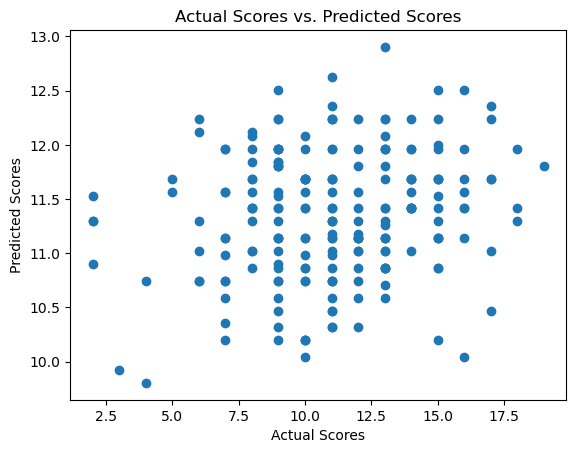

In [59]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual scores
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual Scores vs. Predicted Scores")
plt.show()


In [60]:
print(df.describe())

       Final_Score    ses_score  social_score
count  1044.000000  1044.000000   1044.000000
mean     11.251916    10.081418      2.298851
std       3.282883     1.850625      0.670398
min       1.000000     5.000000      1.000000
25%       9.000000     9.000000      2.000000
50%      11.000000    10.000000      2.000000
75%      13.000000    11.000000      3.000000
max      19.000000    15.000000      4.000000


In [61]:
print(df.columns)

Index(['Final_Score', 'ses_score', 'social_score'], dtype='object')


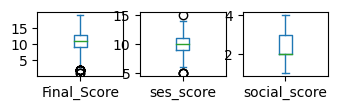

In [62]:
df.plot(kind='box', subplots=True, layout=(5, 5), sharex=False, sharey=False)
plt.show()

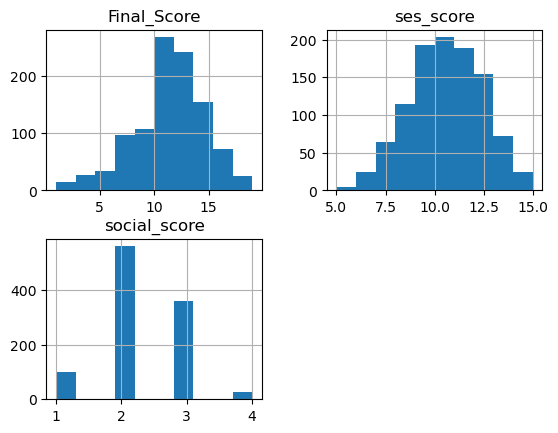

In [63]:
# histograms
from matplotlib import pyplot

df.hist()
pyplot.show()

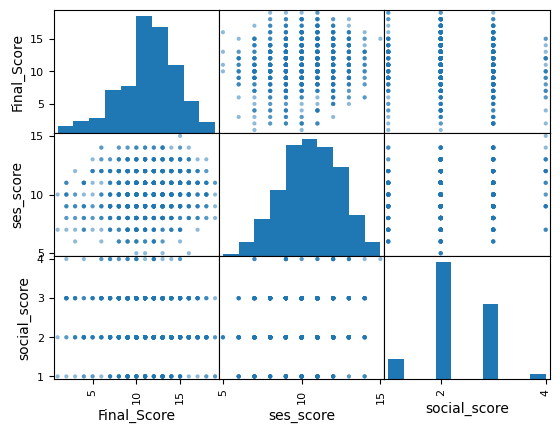

In [64]:
# scatter plot matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df)
pyplot.show()

In [65]:
# Split-out validation dataset
array = df.values
X = array[:,0:2]
Y = array[:,2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Define a random seed for reproducibility
seed = 7

# Create a list of models to spot-check
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Split your data into X_train and Y_train, and make sure they are defined before this point

# Evaluate each model in turn using cross-validation
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.546070 (0.037627)
LDA: 0.546070 (0.037627)
KNN: 0.485011 (0.025230)
CART: 0.475416 (0.046486)
NB: 0.548451 (0.038753)
SVM: 0.548480 (0.039895)


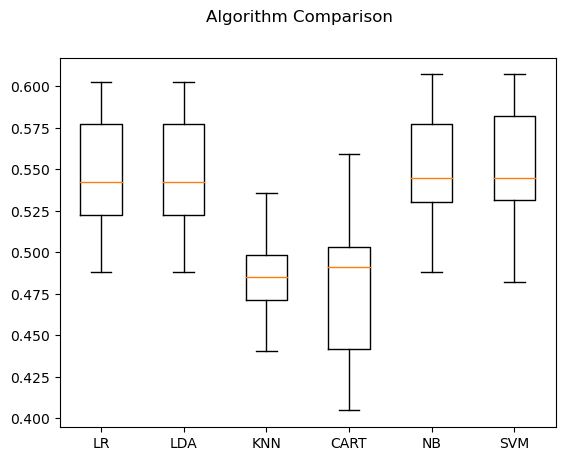

In [67]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [72]:
# Make predictions on validation dataset
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.41148325358851673
[[ 6 15  5  0]
 [15 61 19  1]
 [ 5 56 19  3]
 [ 0  3  1  0]]
              precision    recall  f1-score   support

         1.0       0.23      0.23      0.23        26
         2.0       0.45      0.64      0.53        96
         3.0       0.43      0.23      0.30        83
         4.0       0.00      0.00      0.00         4

    accuracy                           0.41       209
   macro avg       0.28      0.27      0.26       209
weighted avg       0.41      0.41      0.39       209



In [78]:
from sklearn.svm import SVC

# Initialize the SVM model with appropriate hyperparameters
model = SVC(C=1.0, kernel='linear', probability=True)  # Example hyperparameters

# Fit the model with your training data
model.fit(X_train, y_train)  # X_train is your feature data, and y_train is your target data


SVC(kernel='linear', probability=True)

In [79]:
# Define the new student's feature values
new_student_data = [[8, 3]]  # Replace with the actual feature values for the new student

# Make the prediction
predicted_score = model.predict(new_student_data)

print(f"Predicted Final Score: {predicted_score[0]}")

Predicted Final Score: 12.0
